<h3>Importing Libraries</h3>

In [171]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats

<h3>Loading Data</h3>

In [12]:
#loading data
file = 'data/hamoye.csv'
variable_description = 'data/variable_description.csv'
df = pd.read_csv(file)
var_descrp = pd.read_csv(variable_description)

In [ ]:
df.head()

In [13]:
#Dropping index
df.drop('Unnamed: 0', axis=1, inplace =True)

In [14]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


<h2>SOLUTIONS</h2>
<h4> Question 9: %change in fuel_cost_per_unit_burned of coal in 1998 against 1994?</h4>


In [82]:
year_fuel_type = df.groupby(['report_year', 'fuel_type_code_pudl'], axis=0)['fuel_cost_per_unit_burned'].sum()
year_fuel_type

report_year  fuel_type_code_pudl
1994         coal                    14984.572
             gas                     10792.496
             nuclear                227983.354
             oil                      9362.194
             other                     116.737
             waste                     467.782
1995         coal                    14571.785
             gas                      9087.905
             nuclear                384152.639
             oil                     17858.281
             other                     183.577
             waste                     557.459
1996         coal                    12694.803
             gas                      1467.390
             nuclear                 66657.887
             oil                      5357.028
             other                     160.075
             waste                     441.874
1997         coal                    43742.178
             gas                      1518.471
             nuclear       

In [83]:
#locate 1994 and 1998
year_fuel_type.loc[[1994,1998], 'coal']

report_year  fuel_type_code_pudl
1994         coal                   14984.572
1998         coal                   11902.597
Name: fuel_cost_per_unit_burned, dtype: float64

In [132]:
#subtract the difference
a = year_fuel_type.loc[[1994,1998], 'coal'][1] - year_fuel_type.loc[[1994,1998], 'coal'][0]

#add their values
b = year_fuel_type.loc[[1994,1998], 'coal'][1] + year_fuel_type.loc[[1994,1998], 'coal'][0]

#find the percentage change
change = (a/b)*100
print(change.round(2))

-11.46


<b>Answer: the percentage change = -11.46%

<h4>Question 8: What feature has the 2nd and 3rd lowest correlation with fuel_cost_per_unit_burned?</h4>

In [88]:
#print out the correlation table
df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037825,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013553,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018549,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010072,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037825,0.013553,-0.018549,-0.010072,1.000000,0.011007,-0.000438
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000438,-0.000109,1.000000


In [90]:
df.corr()[['fuel_cost_per_unit_burned']].sort_values('fuel_cost_per_unit_burned',ascending=True)

,fuel_cost_per_unit_burned
utility_id_ferc1,-0.037825
fuel_qty_burned,-0.018549
fuel_mmbtu_per_unit,-0.010072
fuel_cost_per_mmbtu,-0.000438
fuel_cost_per_unit_delivered,0.011007
report_year,0.013553
fuel_cost_per_unit_burned,1.000000


<b>Answer:<br/>From the table, the features that have the 2nd and 3rd lowest correlation are: fuel_qty_burned AND fuel_mmbtu_per_unit

<h4>Question 7: The feature with missing values falls under what category? What missing value imputation technique would you use?
</h4>

In [91]:
#check for the column with  missing values
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

<b>Answer1: 'fuel_unit' has 180 missing values</b>


In [96]:
#lets check if its a categorical or numerical column
print(df.nunique())


record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19406
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64


In [98]:
#lets check for the unique values
df['fuel_unit'].unique().tolist()

['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu', 'mwhth', 'gal']

<b>Answer2: The best way to fill the missing values will be categorical/mode imputation since it is a categorical column.</b>

<h4>Question 6: What is the fraction of missing values in dataset?</h4>

In [139]:
#the number of missing value entries is 180
null_frac = ((180/(int(df.shape[0]) - 180))*100)

#rounding to 3 decimal places
round(null_frac, 3)

0.613

<b>Answer: 0.613% of the dataset has missing data

<h4>Question 10: Which year has the highest average fuel cost per unit delivered?
</h4>

In [153]:
df_year = df.groupby(['report_year'], axis=0).mean()

#this removes the scientific notation
pd.set_option('float_format', '{:f}'.format)

df_year

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2724018.494737,10.638098,213.528045,63.636060,3.086977
1995,110.139051,3712066.707744,10.644830,355.047166,32.735269,2.868838
1996,108.714154,2544754.483456,10.778041,79.760163,9196.705948,2.695880
1997,108.366545,2813503.439671,10.247632,149.609108,11140.197239,3.113486
1998,109.845528,3267452.642276,10.704964,126.762493,287.154420,2.775862
1999,108.222857,3281280.862857,10.558885,120.116489,25.551627,2.740251
2000,111.083758,2472032.190823,9.224475,238.692371,985.362877,4.208403
2001,113.521386,2321402.255900,8.371469,133.068775,60.050396,4.612658
2002,120.354357,2145644.932780,8.304833,101.356723,47.594361,6.226281


In [154]:
df_year['fuel_cost_per_unit_delivered'].sort_values(ascending=False)

report_year
1997   11140.197239
1996    9196.705948
2000     985.362877
2009     652.694163
2018     499.269966
2015     326.535511
1998     287.154420
2014     192.737183
2013     172.307591
2004     139.524275
2016     103.901761
2010      91.862105
1994      63.636060
2012      60.994502
2001      60.050396
2011      59.774667
2008      58.588197
2003      55.663493
2002      47.594361
2017      46.196861
2007      43.325023
2005      41.438184
2006      38.657484
1995      32.735269
1999      25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

<b>Answer: 1997 has the highest average fuel_cost_per_unit_delivered</b>

Text(0.5, 1.0, 'average_fuel_cost_per_unit_delivered VS Year')

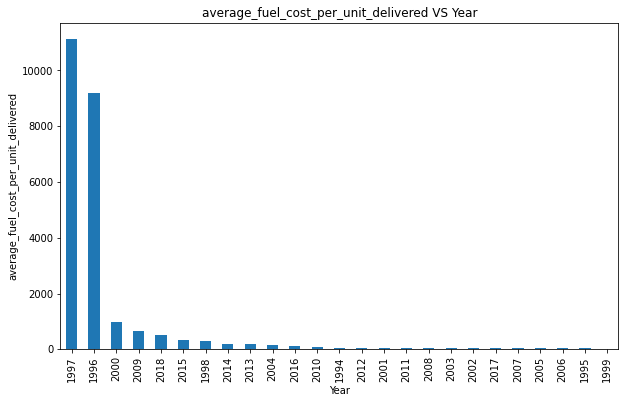

In [160]:
#let's visualize
plt.figure(figsize=[10,6])
df_year['fuel_cost_per_unit_delivered'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('average_fuel_cost_per_unit_delivered')
plt.title('average_fuel_cost_per_unit_delivered VS Year')

<h4>Question 4: What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?
</h4>

In [150]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000
mean,118.601836,2005.806050,2622119.380788,8.492111,208.783643,917.570449,19.304354
std,74.178353,7.025483,9118003.526561,10.600220,2854.480247,68775.925333,2091.540939
min,1.000000,1994.000000,1.000000,0.000001,0.000000,-874.937000,-41.501000
25%,55.000000,2000.000000,13817.000000,1.024000,5.226500,3.778500,1.940000
50%,122.000000,2006.000000,253322.000000,5.762694,26.070000,17.371000,4.127000
75%,176.000000,2012.000000,1424034.000000,17.006000,47.172000,42.137000,7.745000
max,514.000000,2018.000000,555894250.000000,341.260000,139358.000000,7964521.000000,359278.000000


In [152]:
#rounding values to 2 decimal places
df.describe().round(2)

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000
mean,118.600000,2005.810000,2622119.380000,8.490000,208.780000,917.570000,19.300000
std,74.180000,7.030000,9118003.530000,10.600000,2854.480000,68775.930000,2091.540000
min,1.000000,1994.000000,1.000000,0.000000,0.000000,-874.940000,-41.500000
25%,55.000000,2000.000000,13817.000000,1.020000,5.230000,3.780000,1.940000
50%,122.000000,2006.000000,253322.000000,5.760000,26.070000,17.370000,4.130000
75%,176.000000,2012.000000,1424034.000000,17.010000,47.170000,42.140000,7.740000
max,514.000000,2018.000000,555894250.000000,341.260000,139358.000000,7964521.000000,359278.000000


<b>The standard deviation and 75th percentile of fuel_mmbtu_per_unit are: 10.6 and 17.01</b>

In [161]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<h4>Question 3: Which of the following fuel type code has the lowest average fuel cost per unit burned?</h4>

In [165]:
df_type = df.groupby(['fuel_type_code_pudl'], axis=0).mean()


In [168]:
df_type['fuel_cost_per_unit_burned'].sort_values()

fuel_type_code_pudl
gas         13.659397
other       20.489437
waste       27.683193
coal        67.421830
oil        168.877086
nuclear   4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

<b>Answer: Gas has the lowest average_fuel_cost_per_unit_burned</b>

<h4>Question 5:What is the skewness and kurtosis for the fuel quantity burned in two decimal places?</h4>

In [178]:
#skew
skew = df['fuel_qty_burned'].skew()

#kurtosis
kurtosis = df['fuel_qty_burned'].kurtosis()

print(f'The skew is {skew.round(2)} and the kurtosis is {kurtosis.round(2)}')

The skew is 15.85 and the kurtosis is 651.37
